The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables
-Temperature (AT) 
-Exhaust Vacuum (V)
-Ambient Pressure (AP) 
-Relative Humidity (RH) and 
to predict the net hourly
-electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols


In [149]:
#loading the data

import pandas as pd
df1=pd.read_csv("C:/Users/gaura/Downloads/CCPP/somedata.csv")
df1.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [150]:
df1.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


no need to change the data as the data consist of no string 

In [151]:
df1.apply(lambda x: sum(x.isnull()),axis=0)
#NaN values in dataframe

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [152]:
df1.corr()
#correlation 

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


A positive correlation implies that when one variable goes up the other tends to go up. 
Negative correlations indicate an inverse relationship:- when one variable goes up the other tends to go down
A correlation near zero indicates low correlation while 
a correlation near -1 or 1 indicates a large negative or positive correlation.

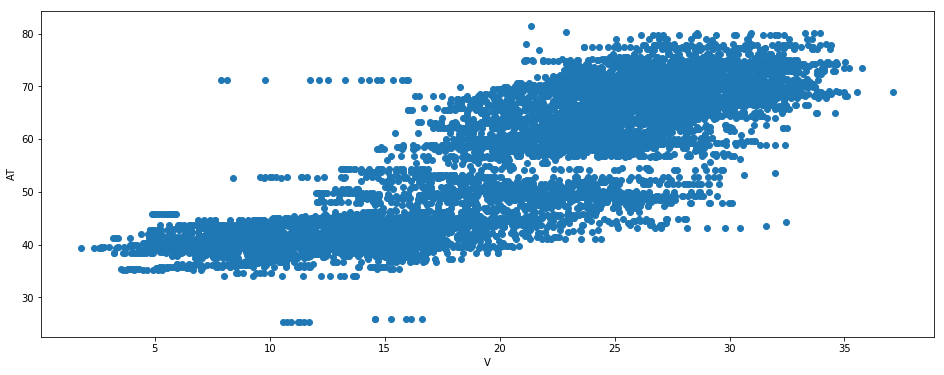

In [154]:
X=df1['AT']
y=df1['V']
plt.scatter(X,y)
plt.ylabel('AT')
plt.xlabel('V')
plt.show()
#linear coeff(0.8)

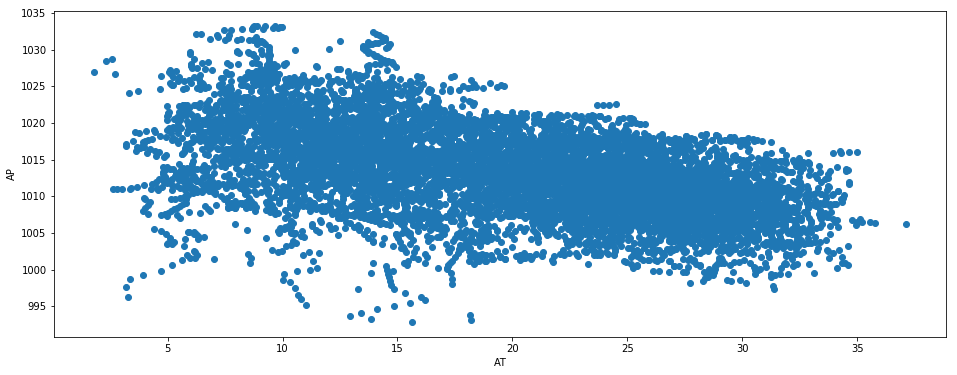

In [155]:
X=df1['AT']
y=df1['AP']
plt.scatter(X,y)
plt.ylabel('AP')
plt.xlabel('AT')
plt.show()
#slightly inversly linear coeff(-0.5)

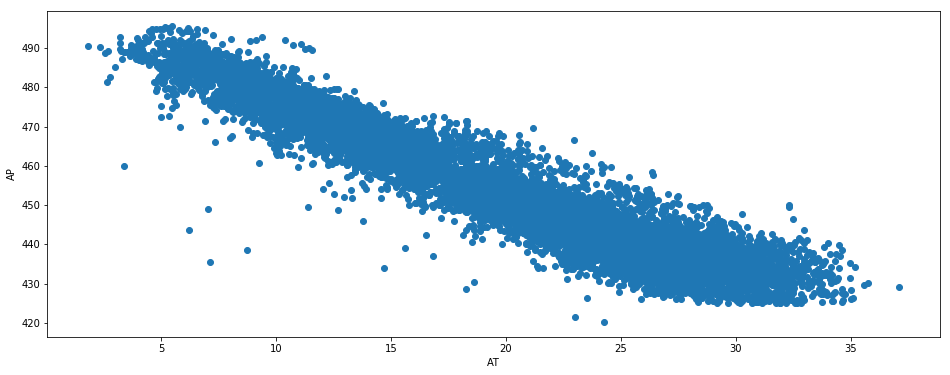

In [156]:
X=df1['AT']
y=df1['PE']
plt.scatter(X,y)
plt.ylabel('AP')
plt.xlabel('AT')
plt.show()
#the relation looks a little inversly linear with increase in radiation results inrease in temperature

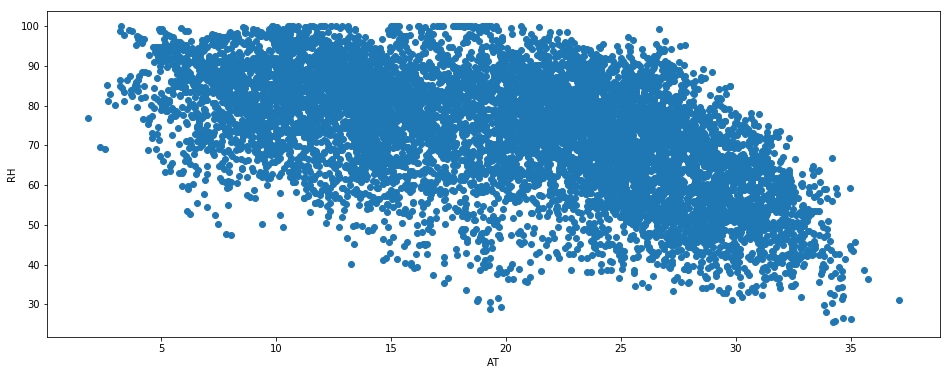

In [157]:
X=df1['AT']
y=df1['RH']
plt.scatter(X,y)
plt.ylabel('RH')
plt.xlabel('AT')
plt.show()
#here the relation is slightly inversly linear with coeff(-0.5)

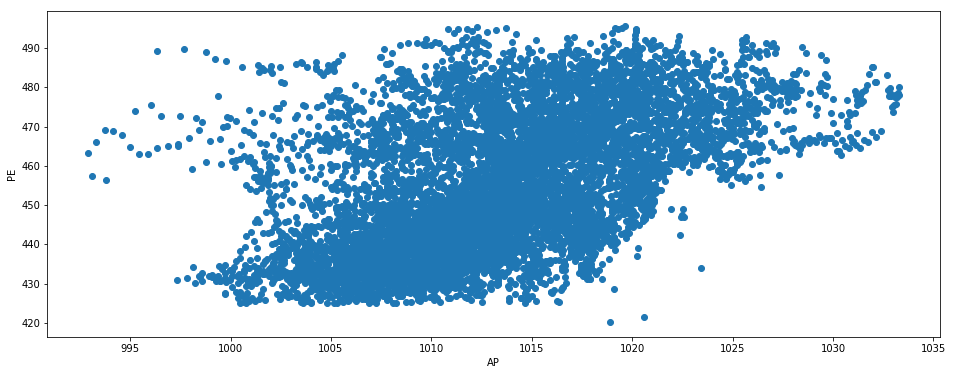

In [158]:
X=df1['AP']
y=df1['PE']
plt.scatter(X,y)
plt.ylabel('PE')
plt.xlabel('AP')
plt.show()
#the relation does looks reversly proportional with an increase in humidity decrese in temperature 

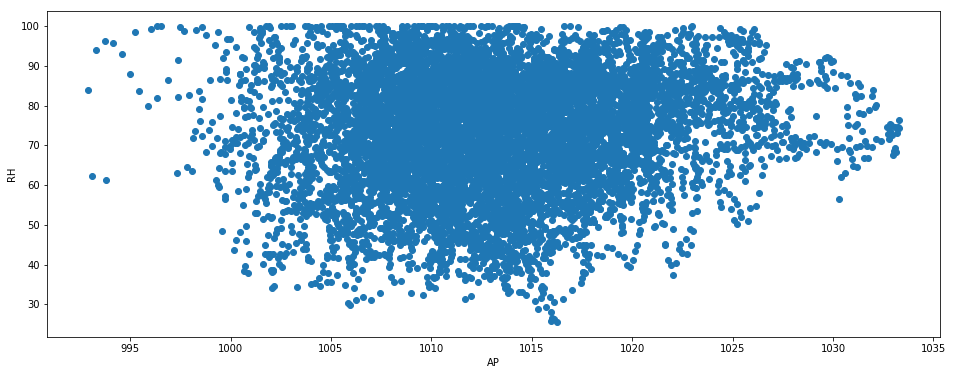

In [159]:
X=df1['AP']
y=df1['RH']
plt.scatter(X,y)
plt.ylabel('RH')
plt.xlabel('AP')
plt.show()
#not linear

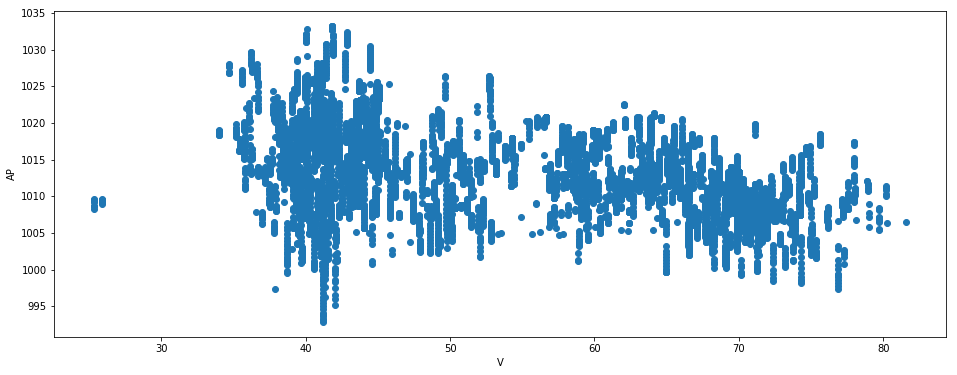

In [160]:
X=df1['V']
y=df1['AP']
plt.scatter(X,y)
plt.ylabel('AP')
plt.xlabel('V')
plt.show()
#not linear

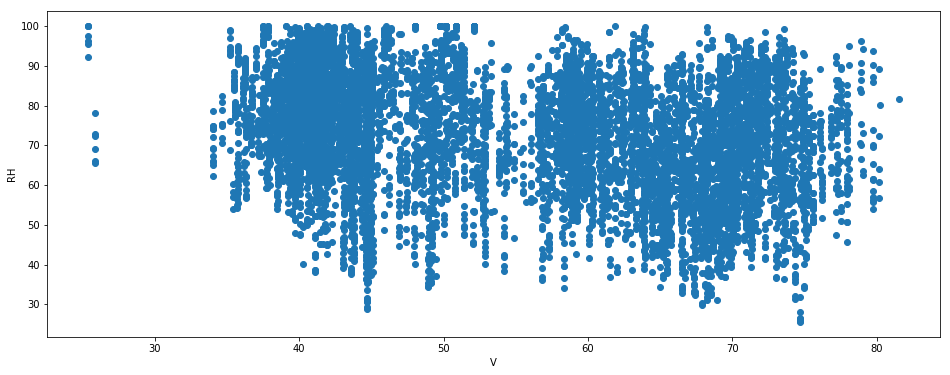

In [161]:
X=df1['V']
y=df1['RH']
plt.scatter(X,y)
plt.ylabel('RH')
plt.xlabel('V')
plt.show()
#not linear

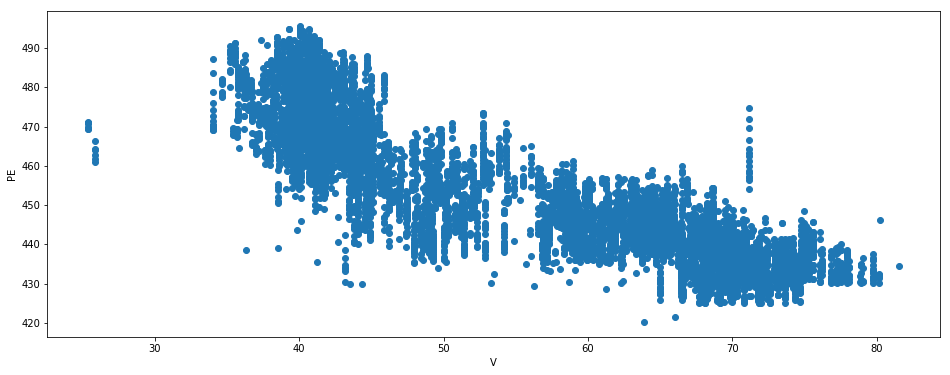

In [162]:
X=df1['V']
y=df1['PE']
plt.scatter(X,y)
plt.ylabel('PE')
plt.xlabel('V')
plt.show()
#inversly linear with coeff(-0.8)

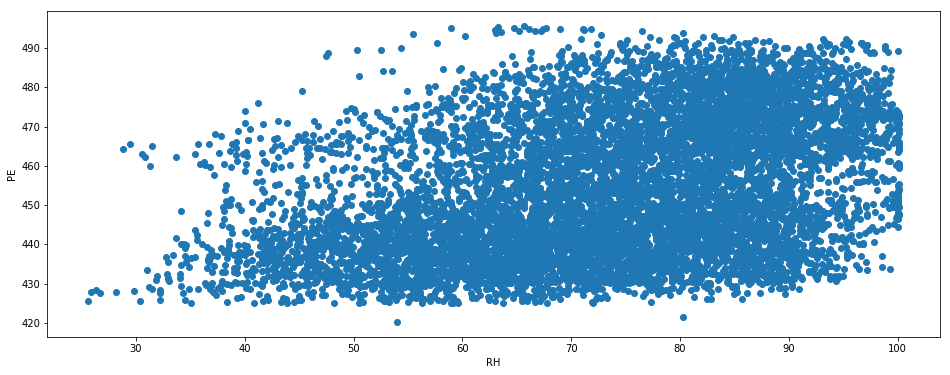

In [163]:
X=df1['RH']
y=df1['PE']
plt.scatter(X,y)
plt.ylabel('PE')
plt.xlabel('RH')
plt.show()
#slightly linear with coeff(0.3)

In [164]:
X = df1[["AT","V","AP","RH"]]
y = df1[["PE"]]
#to determine the power o/p on the other four factors

In [165]:

print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [166]:
model = linear_model.LinearRegression()
results = model.fit(X, y)
print(results)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [167]:

# Print the coefficients
print (results.intercept_, results.coef_)

[ 454.60927432] [[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]]


In [168]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()
# Here the Ordinalry Least Squares method has given us the r^2 value of 1 which is decent enough for our model to be 
# predicted on these variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.939e+07
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:59:35   Log-Likelihood:                -29068.
No. Observations:                9568   AIC:                         5.814e+04
Df Residuals:                    9564   BIC:                         5.817e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.6781      0.015   -109.169      0.000      -1.708      -1.648
V             -0.2726      0.008    -34.019      0.000      -0.288      -0.257
AP             0.5028      0.000   1209.083      0.000       0.502       0.504
RH            -0.0999      0.004    -22.678      0.000      -0.109      -0.091
==============================================================================
Omnibus:                      491.038   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1475.265
Skew:                          -0.224   Prob(JB):                         0.00
Kurtosis:                       4.871   Cond. No.                         336.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
ypred=results.predict()
print(ypred)
#predicting the results 

[ 471.09692422  447.54877425  480.38530674 ...,  432.8239588   443.51589476
  451.38496319]


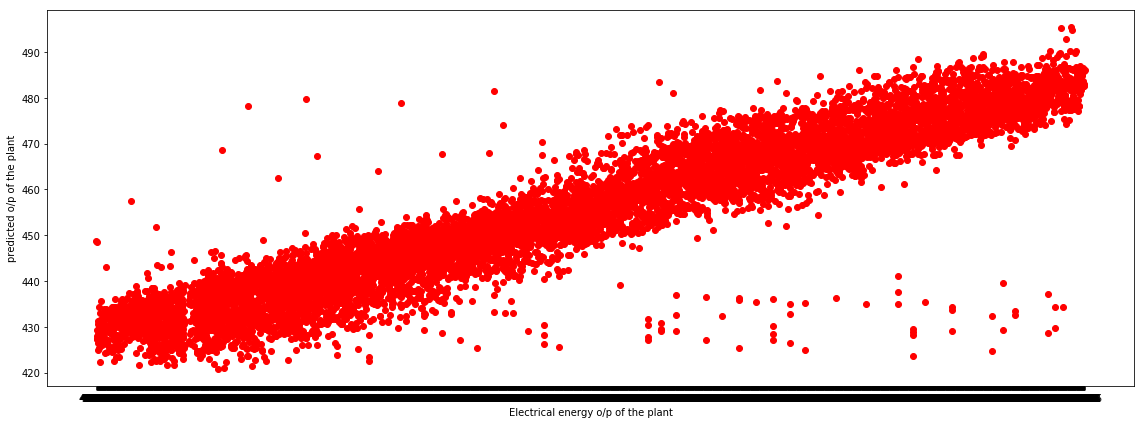

In [176]:
plt.scatter(y, ypred , color='red')
plt.xlabel("Electrical energy o/p of the plant")
plt.ylabel("predicted o/p of the plant")
plt.tight_layout()
plt.show()
#graph of predicted and actual energy


In [171]:
rmseFull = np.sqrt(metrics.mean_squared_error(y, ypred))
print(rmseFull)
#the rms value is the difference between the actual energy and the predicted energy

5.04876916877


In [172]:
print(r2_score(y, ypred))
y_m=np.mean(y)
print(rmseFull/y_m)
#score of the model is 0.91

0.912481009349
PE    0.011112
dtype: float64


In [173]:
#Implementing VIF (Variance Inflation Factor) to check whether the selected independent variables are correct for prediction 
# or not. Also, 'AT', 'V' 'AP' and 'RH' had very close levels of co-relation with PE which makes us to investigate whether all 
# three are important or not.
indep=['AT','V','AP','RH']
X=df1[indep]
 

In [174]:
thresh=20
#threshold of 10
for i in np.arange(0,len(indep)):
    vif=[variance_inflation_factor(X[indep].values,ix)
    for ix in range(X[indep].shape[1])]
    maxloc=vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print( X[indep].columns[maxloc] )
        del indep[maxloc]
    else:
        break
        
    print ('Final variables: ', indep)

vif : [39.157704919526125, 74.969127425011621, 66.618617806017866, 40.704756061153432]
V
Final variables:  ['AT', 'AP', 'RH']
vif : [10.821373334186132, 64.595152157747521, 36.414049283220471]
AP
Final variables:  ['AT', 'RH']


After the vif we see that V and AP surpasses the threshold and we are left with AT and RH whose relationship is shown below which clearly states an inversly proportional relation.

In [175]:
X[indep].head(5)

,AT,RH
0,14.96,73.17
1,25.18,59.08
2,5.11,92.14
3,20.86,76.64
4,10.82,96.62


Now fitting the model based on AT and RH

In [145]:
X=df1[["AT","RH"]]
y=df1[["PE"]]

In [146]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.420e+05
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:55:28   Log-Likelihood:                -53264.
No. Observations:                9568   AIC:                         1.065e+05
Df Residuals:                    9566   BIC:                         1.065e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT             5.4747      0.065     84.617      0.000       5.348       5.602
RH             4.6252      0.018    254.251      0.000       4.590       4.661
==============================================================================
Omnibus:                       47.740   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.468
Skew:                           0.160   Prob(JB):                     4.93e-11
Kurtosis:                       2.873   Cond. No.                         7.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[ 454.60927432] [[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]]


In [181]:
model = linear_model.LinearRegression()
results = model.fit(X, y)
pred_train=results.predict(X)
pred_test=results.predict(X)
print(results.score(X,y))
print(results.score(X,y))

0.928696089812
0.928696089812


In [182]:
print(pred_train)
#predicting training set

[[ 467.26978996]
 [ 444.0773659 ]
 [ 483.56264263]
 ..., 
 [ 432.40579787]
 [ 443.03667582]
 [ 449.69603741]]


In [185]:
print(pred_test)
#predicting testing set

[[ 467.26978996]
 [ 444.0773659 ]
 [ 483.56264263]
 ..., 
 [ 432.40579787]
 [ 443.03667582]
 [ 449.69603741]]


In [187]:
rmsetrain = np.sqrt(metrics.mean_squared_error(y, pred_train))
print(rmsetrain)
rmsetest = np.sqrt(metrics.mean_squared_error(y, pred_test))
print(rmsetest)
#Even the rmse's do not vary much.(5.04 and 4.55)

4.55712601675
4.55712601675


In [190]:
y_m=np.mean(y)
print(y_m)
print(rmsetrain/y_m)
print(rmsetest/y_m)

PE    454.365009
dtype: float64
PE    0.01003
dtype: float64
PE    0.01003
dtype: float64


R^2 value is basically dependant on the way the data is split. Hence, there may be times when the R^2 value may not be able to represent the modals ability to generalize.

In [200]:
reg=linear_model.LinearRegression()
cv_results=cross_val_score(reg,X,y,cv=5)
print(cv_results)
print(np.mean(cv_results))
print(np.std(cv_results))

[ 0.93053597  0.92681472  0.93389127  0.92680208  0.92464499]
0.928537806674
0.00327987841916


Ridge Regerassions

In [206]:
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X,y)
ridge_pred=ridge.predict(X)
ridge.score(X,y)
#The score is pretty much similar to the linear model built which ensures that the model has passed the Ridge regression test

0.91729748031673042

# Lasso Regerassion

In [207]:

lasso=Lasso(alpha=.1)
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

[-1.97257015 -0.23551989  0.0606258  -0.15659278]


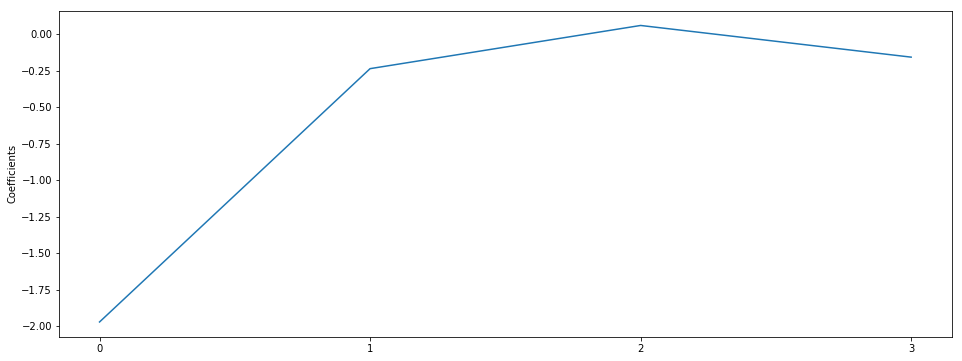

In [210]:

_ =plt.plot(range(len(X.T)),lasso_coef)
_ =plt.xticks(range(len(X.T)), X.T)
_ =plt.ylabel('Coefficients')
plt.show()
#we can see from the regerassion that the AT plays an important role in predicting the values of power

The relationship above is significant. The model has been assumed based on the co-relation obtained between the independent and dependent variables. The rsme's calculated are pretty much same even when the data is split into test and train which does not show much of a difference in the R^2 value of the model which plays a crucial role in prediction.
The co-relation table has shown high co-relation in cases of 4 columns and VIF has been used to check whether all the highly co-related values are required for prediction. 
Well here the two variables on which the modal is predicted are AT and RH which shows a significant relation with the output power.
Yes, the model makes sense as the final residual plot which shows the original price values and the predicted values are pretty much in sync with each other. Also, there is 91% chance of correct prediction of price whenever new data comes which counts for the proper training of this model.
I have used ridge and lasso regression as regularization methods to penalise the loss function for high coefficients.the score of the model is 0.91 as compared to 0.92 on train and 0.92 on test which does not help much.